In [53]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
#read in data and display columns hidden by Pandas default truncation

df = pd.read_csv("expenses_cleaned_final.csv")
pd.set_option('display.max_columns', None)
df.head(50)
df.rename(columns={"Facilities and Equipment": "Facilities_Equipment", "Coaches Compensation": "Coach_Pay"}, inplace = True)
df.head()

,Total Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities_Equipment,Coach_Pay,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,4371215.0,128579.0,51111.0,11111.0,28178.0,571295.0,318569.0,1161948.0,368339.0,1845317.0,1683189.0,32211.0,122925.0,12111.0,341938.0,299178.0,115893529.0,1449621.0,418314.0,9111111.0,887926.0
1,7811439.0,562826.0,349618.0,37343.0,21484.0,796769.0,1914943.0,1483177.0,581562.0,2164827.0,9733551.0,427239.0,1.0,27411.0,258534.0,464678.0,119997615.0,1697311.0,624118.0,9361312.0,1141711.0
2,5355699.0,179991.0,333251.0,39111.0,34325.0,518589.0,88352.0,1795298.0,461562.0,1916333.0,6847295.0,117976.0,57155.0,11111.0,418187.0,513257.0,114831523.0,1761148.0,748511.0,9178121.0,659559.0
3,6368281.0,291441.0,212169.0,28211.0,61731.0,1711331.0,231151.0,1683784.0,437111.0,1724677.0,7254361.0,114848.0,81281.0,22711.0,416893.0,71165.0,118162615.0,2175311.0,778511.0,9178121.0,659559.0
4,6641311.0,514363.0,226421.0,43511.0,42619.0,891479.0,513777.0,1683784.0,437111.0,2288358.0,8711959.0,117226.0,113468.0,71127.0,366542.0,525176.0,119214914.0,2192581.0,778511.0,8448111.0,1139645.0


In [183]:
# renaming columns I need that have spaces to avoid errors while plotting

df = df.rename(columns={"Total Expenses": "Total_Expenses"})
df.head(50)

,Total_Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities_Equipment,Coach_Pay,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,"$4,371,215.0","$128,579.0","$51,111.0","$11,111.0","$28,178.0","$571,295.0","$318,569.0","$1,161,948.0","$368,339.0","$1,845,317.0","$1,683,189.0","$32,211.0","$122,925.0","$12,111.0","$341,938.0","$299,178.0","$115,893,529.0","$1,449,621.0","$418,314.0","$9,111,111.0","$887,926.0"
1,"$7,811,439.0","$562,826.0","$349,618.0","$37,343.0","$21,484.0","$796,769.0","$1,914,943.0","$1,483,177.0","$581,562.0","$2,164,827.0","$9,733,551.0","$427,239.0",$1.0,"$27,411.0","$258,534.0","$464,678.0","$119,997,615.0","$1,697,311.0","$624,118.0","$9,361,312.0","$1,141,711.0"
2,"$5,355,699.0","$179,991.0","$333,251.0","$39,111.0","$34,325.0","$518,589.0","$88,352.0","$1,795,298.0","$461,562.0","$1,916,333.0","$6,847,295.0","$117,976.0","$57,155.0","$11,111.0","$418,187.0","$513,257.0","$114,831,523.0","$1,761,148.0","$748,511.0","$9,178,121.0","$659,559.0"
3,"$6,368,281.0","$291,441.0","$212,169.0","$28,211.0","$61,731.0","$1,711,331.0","$231,151.0","$1,683,784.0","$437,111.0","$1,724,677.0","$7,254,361.0","$114,848.0","$81,281.0","$22,711.0","$416,893.0","$71,165.0","$118,162,615.0","$2,175,311.0","$778,511.0","$9,178,121.0","$659,559.0"
4,"$6,641,311.0","$514,363.0","$226,421.0","$43,511.0","$42,619.0","$891,479.0","$513,777.0","$1,683,784.0","$437,111.0","$2,288,358.0","$8,711,959.0","$117,226.0","$113,468.0","$71,127.0","$366,542.0","$525,176.0","$119,214,914.0","$2,192,581.0","$778,511.0","$8,448,111.0","$1,139,645.0"
5,"$6,561,218.0","$367,169.0","$185,786.0","$23,148.0","$57,686.0","$781,217.0","$178,128.0","$1,478,326.0","$878,334.0","$2,611,714.0","$6,585,588.0","$295,436.0",$912.0,$1.0,"$426,266.0","$621,954.0","$126,154,615.0","$2,188,619.0","$695,891.0","$8,448,111.0","$1,139,645.0"
6,"$6,981,583.0","$198,499.0","$177,181.0",$1.0,"$57,686.0","$874,612.0","$219,174.0","$1,421,117.0","$983,973.0","$3,158,352.0","$6,113,172.0","$171,178.0",$971.0,$1.0,"$571,611.0","$315,394.0","$128,543,652.0","$2,176,195.0","$551,499.0","$7,317,255.0","$1,141,745.0"
7,"$6,614,394.0","$119,573.0","$152,461.0",$1.0,"$55,345.0","$1,193,244.0","$221,613.0","$1,297,928.0","$554,613.0","$3,119,627.0","$5,516,444.0","$243,596.0","$17,991.0",$1.0,"$395,128.0","$468,636.0","$121,416,136.0","$2,411,985.0","$642,111.0","$6,166,511.0","$913,296.0"
8,"$7,349,658.0","$416,449.0","$195,788.0",$1.0,"$71,472.0","$1,313,829.0","$257,317.0","$1,421,292.0","$1,116,313.0","$2,588,218.0","$7,349,658.0","$195,443.0","$18,618.0",$1.0,"$415,599.0","$395,191.0","$126,634,661.0","$2,259,142.0","$679,112.0","$6,162,364.0","$667,583.0"
9,"$7,241,911.0","$393,643.0","$176,769.0",$1.0,"$141,233.0","$899,724.0","$138,572.0","$1,741,426.0","$497,495.0","$3,252,149.0","$9,568,473.0","$316,786.0","$11,921.0","$562,731.0","$322,469.0","$374,897.0","$116,456,421.0","$2,655,149.0","$852,599.0","$5,675,671.0","$666,193.0"


In [134]:
# assigning dependent and independent variables

X = df[['Total_Expenses']]
y = df[['Total Revenues']].values.reshape(-1,1)

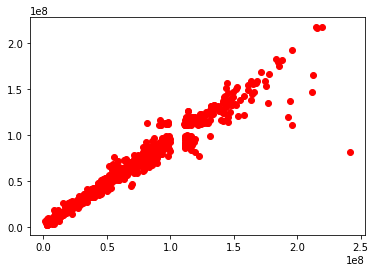

In [260]:
#proving linearity between Total Revenues and Total Expenses

plt.scatter(df['Total Revenues'], df["Total_Expenses"], color = 'red')


plt.savefig("linearity.png")

In [137]:
# create training and testing data using random state of 0 for reproducible validations of the model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [138]:
# Scale the data using StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [139]:
#fit the model to the training data and calculate the scores for the training and test data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

#print training and testing scores

print(f"Training Score:{training_score}")
print(f"Testing Score:{testing_score}")

Training Score:0.9688777809667591
Testing Score:0.9845432196439733


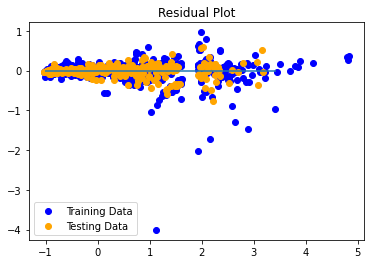

In [259]:
# plot the residuals

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

plt.savefig("model_residual_plot.png")

In [141]:
# quantify the model using mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.01310397093451987, R2: 0.9845432196439733


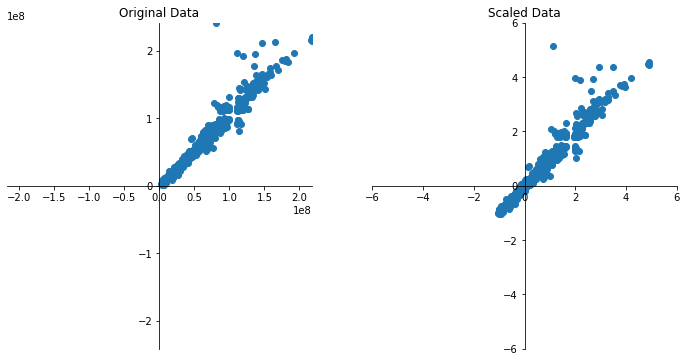

In [261]:
# plotting original data and scaled data

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Total Expenses"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 2, maxx + 2)
axes1.set_ylim(-maxy + 2, maxy + 2)

axes2.set_xlim(-6, 6)
axes2.set_ylim(-6, 6)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Total Expenses"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
plt.savefig("actual_scaled.png")

In [263]:
# reassigning variables

y_predicted = model.predict(X_test)
print(y_predicted)

[[1.10134978e+07]
 [4.39128273e+07]
 [2.54661746e+07]
 [7.43765725e+06]
 [9.21204129e+07]
 [1.14310395e+08]
 [1.75401677e+07]
 [2.79720302e+07]
 [2.28690039e+07]
 [7.78721696e+07]
 [1.21436148e+08]
 [5.74635656e+07]
 [1.43063770e+07]
 [2.50128656e+07]
 [6.02313832e+07]
 [1.22008821e+08]
 [7.50244857e+07]
 [7.98470361e+06]
 [4.54866087e+07]
 [9.29703008e+07]
 [1.22854987e+07]
 [8.08475538e+06]
 [7.20408598e+06]
 [2.41141015e+07]
 [7.26180380e+07]
 [5.60781016e+07]
 [8.14340545e+07]
 [1.35341408e+07]
 [3.27673023e+07]
 [8.83121833e+07]
 [1.34731122e+07]
 [6.01603746e+07]
 [9.27139504e+07]
 [1.29110915e+07]
 [1.76998070e+07]
 [7.02338330e+06]
 [1.51104745e+07]
 [1.51356897e+07]
 [1.54096443e+08]
 [1.09993305e+07]
 [3.61377623e+07]
 [2.39357553e+07]
 [8.96890168e+07]
 [2.53404007e+07]
 [5.37890642e+06]
 [1.21017418e+08]
 [8.99132459e+07]
 [5.43000442e+07]
 [8.54640052e+06]
 [6.33137389e+07]
 [1.12395764e+07]
 [2.85370787e+07]
 [2.85068976e+07]
 [3.91256887e+07]
 [1.29681562e+07]
 [1.096648

In [144]:
# reassigning continues..

y_actual = y_test
print(y_actual)

[[1.11889870e+07]
 [4.51662580e+07]
 [2.66465470e+07]
 [7.35542600e+06]
 [9.84853950e+07]
 [1.16139192e+08]
 [1.87113620e+07]
 [2.79541640e+07]
 [2.37613930e+07]
 [7.97118560e+07]
 [1.23769841e+08]
 [5.85157190e+07]
 [1.45343350e+07]
 [2.56277520e+07]
 [6.11911110e+07]
 [1.41651461e+08]
 [8.51728860e+07]
 [7.63423100e+06]
 [4.92415160e+07]
 [1.11878633e+08]
 [1.24812560e+07]
 [8.21893600e+06]
 [7.19637400e+06]
 [2.41124160e+07]
 [6.51177150e+07]
 [5.95348950e+07]
 [7.89598750e+07]
 [1.16432480e+07]
 [2.79131790e+07]
 [9.46358290e+07]
 [1.34181480e+07]
 [6.19681570e+07]
 [9.52167620e+07]
 [1.35589250e+07]
 [1.78316580e+07]
 [7.14126300e+06]
 [1.52732670e+07]
 [1.53768620e+07]
 [1.44514413e+08]
 [1.13252610e+07]
 [3.67721990e+07]
 [2.36842660e+07]
 [9.12621420e+07]
 [2.81452720e+07]
 [5.46461400e+06]
 [1.33679256e+08]
 [9.12567720e+07]
 [5.43544190e+07]
 [9.61122600e+06]
 [6.45219720e+07]
 [1.14711510e+07]
 [2.86364870e+07]
 [2.89641510e+07]
 [4.13341260e+07]
 [1.32758580e+07]
 [1.148448

In [206]:
# concatenate predicted and actual revenues

data = pd.DataFrame(np.concatenate((y_predicted.reshape(len(y_predicted),1),y_actual.reshape(len(y_actual),1)),1))
data.columns = ["Predicted", "Actual"]
pd.options.display.float_format='{:,.1f}'.format
data.head(50)

,Predicted,Actual
0,"11,013,497.8","11,188,987.0"
1,"43,912,827.3","45,166,258.0"
2,"25,466,174.6","26,646,547.0"
3,"7,437,657.3","7,355,426.0"
4,"92,120,412.9","98,485,395.0"
5,"114,310,395.3","116,139,192.0"
6,"17,540,167.7","18,711,362.0"
7,"27,972,030.2","27,954,164.0"
8,"22,869,003.9","23,761,393.0"
9,"77,872,169.6","79,711,856.0"


In [216]:
# subtract predicted revenue from actual revenue to find predicted profit

predicted_profit = data["Actual"] - data["Predicted"]
profit = pd.DataFrame(data=predicted_profit)
profit.columns=["Predicted Profit"]
profit.head()

,Predicted Profit
0,"175,489.2"
1,"1,253,430.7"
2,"1,180,372.4"
3,"-82,231.3"
4,"6,364,982.1"


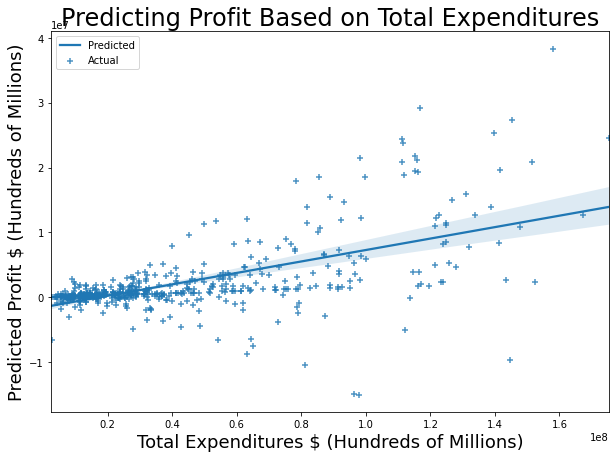

In [265]:
# plot relationship between predicted profit and total expenditures

import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=y_actual, y=profit, marker='+')



# Legend, title and labels.
plt.legend(labels=['Predicted', 'Actual'])
plt.title('Predicting Profit Based on Total Expenditures', size=24)
plt.xlabel('Total Expenditures $ (Hundreds of Millions)', size=18)
plt.ylabel('Predicted Profit $ (Hundreds of Millions)', size=18)
plt.savefig("predicted_profit.png")

array([[<AxesSubplot:title={'center':'Annual Debt Service, Leases and Rental Fees on Athletic Facilities'}>,
        <AxesSubplot:title={'center':'Athletic Student Aid'}>,
        <AxesSubplot:title={'center':'Athletics Related Debt'}>,
        <AxesSubplot:title={'center':'Coach_Pay'}>,
        <AxesSubplot:title={'center':'Competition Guarantees'}>],
       [<AxesSubplot:title={'center':'Corporate Sponsorship, Advertising, Licensing'}>,
        <AxesSubplot:title={'center':'Donor Contributions'}>,
        <AxesSubplot:title={'center':'Facilities_Equipment'}>,
        <AxesSubplot:title={'center':'Game Expenses and Travel'}>,
        <AxesSubplot:title={'center':'Medical'}>],
       [<AxesSubplot:title={'center':'NCAA/Conference Distributions, Media Rights, and Post-Season Football'}>,
        <AxesSubplot:title={'center':'Other Expenses'}>,
        <AxesSubplot:title={'center':'Other Revenue'}>,
        <AxesSubplot:title={'center':'Recruiting'}>,
        <AxesSubplot:title={'center'

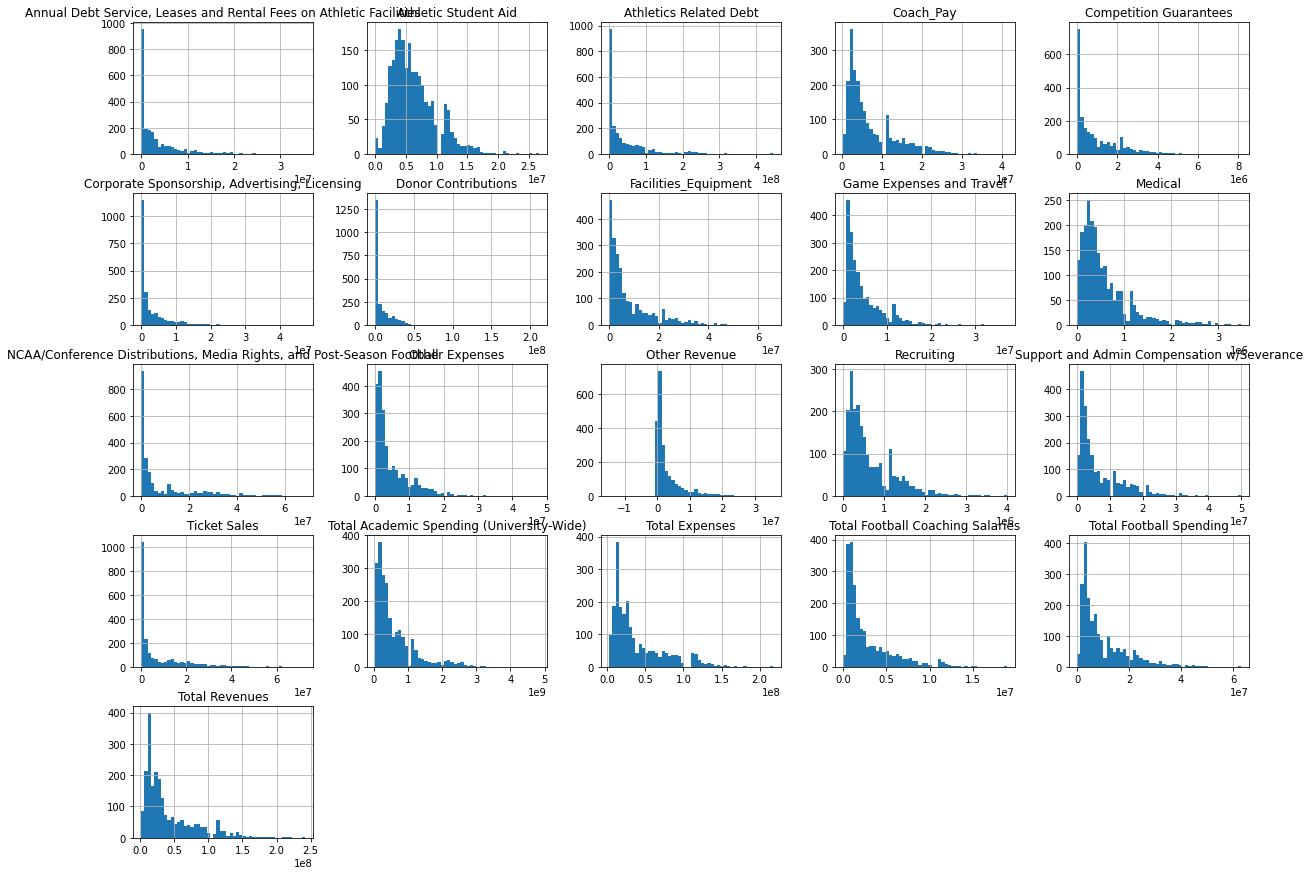

In [146]:
# exploration.. trying to visualize multiple variables (didn't work)

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

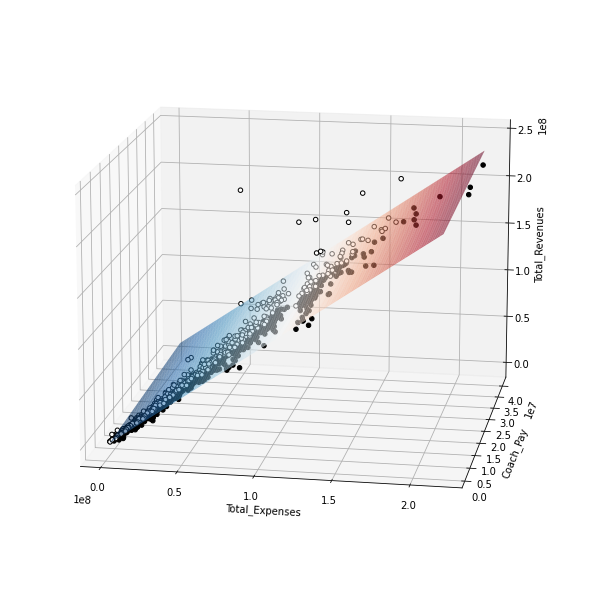

In [250]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

X = df[['Total_Expenses', 'Coach_Pay']]
y = df['Total Revenues']

## fit a OLS model with intercept on Recruiting and Facilities/Equipment Cost
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

# Create the 3d plot

xx1, xx2 = np.meshgrid(np.linspace(X.Total_Expenses.min(), X.Total_Expenses.max(), 100), 
                       np.linspace(X.Coach_Pay.min(), X.Coach_Pay.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-80, elev=15)

# plot hyperplane

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points. points over the horizontal plane are white, points below are black

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Total_Expenses, X[resid >= 0].Coach_Pay, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Total_Expenses, X[resid < 0].Coach_Pay, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Total_Expenses')
ax.set_ylabel('Coach_Pay')
ax.set_zlabel('Total_Revenues')
plt.savefig("multi_plot")

In [228]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total Revenues   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 3.920e+04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:37:44   Log-Likelihood:                -38060.
No. Observations:                2228   AIC:                         7.613e+04
Df Residuals:                    2225   BIC:                         7.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.17e+06   2.07e+05     -5.647      0.000   -1.58e+06   -7.63e+05
Total_Expenses     1.0245      0.016     63.281      0.000       0.993       1.056
Coach_Pay          0.2219      0.094      2.361      0.018       0.038       0.406
==============================================================================
Omnibus:                     3454.671   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3536668.334
Skew:                           9.241   Prob(JB):                         0.00
Kurtosis:                     197.307   Cond. No.                     8.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""